# Schedule TPC-DS 1 Descriptor

This notebook contains work pertatining to pattern learning / identification for a database workload schedule. It contains descriptors of the available data through plot visualizations, so as to better understand which resource play a part into reflecting underlying workloads.

## Data Preprocessing

### Module Installation and Importing Libraries

In [223]:
# Module Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Configuration Cell

Tweak parametric changes from this cell to influence outcome of experiment. 
NB: This experiment demonstrates at time  step = 1 (1 minute in advance). Further down in experiment, other timestep results are also featured and evaluated.

In [224]:
tpcds='TPCDS1'
nrows=2000000

### Read data from file into Pandas Dataframes

In [225]:
# Root path
#root_dir = 'C:/Users/gabriel.sammut/University/Data_ICS5200/Schedule/' + tpcds
root_dir = 'D:/Projects/Datagenerated_ICS5200/Schedule/' + tpcds

# Open Data
rep_vsql_plan_path = root_dir + '/rep_vsql_plan.csv'

rep_vsql_plan_df = pd.read_csv(rep_vsql_plan_path, nrows=nrows)

def prettify_header(headers):
    """
    Cleans header list from unwated character strings
    """
    header_list = []
    [header_list.append(header.replace("(","").replace(")","").replace("'","").replace(",","")) for header in headers]
    return header_list

rep_vsql_plan_headers = prettify_header(rep_vsql_plan_df.columns.values)

# Replace original headers with a prettified version of the same column list
rep_vsql_plan_df = pd.read_csv(rep_vsql_plan_path, names=rep_vsql_plan_headers, nrows=nrows)

rep_vsql_plan_df.drop(rep_vsql_plan_df.index[0],inplace=True)

print("---------------------------------------------------------------------------------")
print(rep_vsql_plan_df.head())
print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
         DBID         SQL_ID PLAN_HASH_VALUE ID         OPERATION  \
1  2634225673  dxv968j0352kb       103598129  0  SELECT STATEMENT   
2  2634225673  dxv968j0352kb       103598129  1              SORT   
3  2634225673  dxv968j0352kb       103598129  2    PX COORDINATOR   
4  2634225673  dxv968j0352kb       103598129  3           PX SEND   
5  2634225673  dxv968j0352kb       103598129  4              SORT   

       OPTIONS OBJECT_NODE OBJECT# OBJECT_OWNER OBJECT_NAME  ...    \
1          NaN         NaN     NaN          NaN         NaN  ...     
2     GROUP BY         NaN     NaN          NaN         NaN  ...     
3          NaN         NaN     NaN          NaN         NaN  ...     
4  QC (RANDOM)      :Q1001     NaN          SYS    :TQ10001  ...     
5     GROUP BY      :Q1001     NaN          NaN         NaN  ...     

  ACCESS_PREDICATES FILTER_PREDICATES PROJECTION TIME QBLOCK_NAME REMARKS  \
1    

### Checking for NaN Values

Checking dataframes for potential missing values/data:

In [226]:
def get_na_columns(df):
    """
    Return columns which consist of NAN values
    """
    na_list = []
    for head in df.columns:
        if df[head].isnull().values.any():
            na_list.append(head)
    return na_list

print("Table REP_VSQL_PLAN: " + str(get_na_columns(df=rep_vsql_plan_df)) + "\n\n")

def fill_na(df):
    """
    Replaces NA columns with 0s
    """
    return df.fillna(0)

# Populating NaN values with amount '0'
rep_vsql_plan_df = fill_na(df=rep_vsql_plan_df)

Table REP_VSQL_PLAN: ['OPTIONS', 'OBJECT_NODE', 'OBJECT#', 'OBJECT_OWNER', 'OBJECT_NAME', 'OBJECT_ALIAS', 'OBJECT_TYPE', 'OPTIMIZER', 'PARENT_ID', 'COST', 'CARDINALITY', 'BYTES', 'OTHER_TAG', 'PARTITION_START', 'PARTITION_STOP', 'PARTITION_ID', 'OTHER', 'DISTRIBUTION', 'CPU_COST', 'IO_COST', 'TEMP_SPACE', 'ACCESS_PREDICATES', 'FILTER_PREDICATES', 'PROJECTION', 'TIME', 'QBLOCK_NAME', 'REMARKS', 'OTHER_XML']




# Dataset Description

All data sources are retrieved from Oracle defined tables/views. These sources have been specifically chosen because they accurately portray a database system under load, across a period of time. Such data sources were polled at regular intervals (60 seconds), and recorded into intermediatery tables for future data mining potential. Each statistic set corresponds to a 'SNAP_ID', which quantifies a particular resource usage at a point in time. 'SNAP_ID' delta equates to 60 seconds. In addition, relavent SQL access plans taken during the workloads execution were also captured.

Statistical calculations:
* Column Names
* Dataframe Row Counts
* Mean (were applicable)
* Standard Dev (were applicable)
* Quartile Percentile
* Min / Max

In [227]:
print('-----------------------------------------------------------')
print('Dataframe Row Count: VSQL_PLAN - ' + str(len(rep_vsql_plan_df)))
print('-----------------------------------------------------------\n')

print('\n\nVSQL_PLAN:')
print(rep_vsql_plan_df.describe())

-----------------------------------------------------------
Dataframe Row Count: VSQL_PLAN - 1999999
-----------------------------------------------------------



VSQL_PLAN:
       PARTITION_ID      OTHER  ACCESS_PREDICATES  FILTER_PREDICATES  \
count  1.999999e+06  1999999.0          1999999.0          1999999.0   
mean   1.182501e-03        0.0                0.0                0.0   
std    1.108743e-01        0.0                0.0                0.0   
min    0.000000e+00        0.0                0.0                0.0   
25%    0.000000e+00        0.0                0.0                0.0   
50%    0.000000e+00        0.0                0.0                0.0   
75%    0.000000e+00        0.0                0.0                0.0   
max    1.100000e+01        0.0                0.0                0.0   

       PROJECTION    REMARKS  
count   1999999.0  1999999.0  
mean          0.0        0.0  
std           0.0        0.0  
min           0.0        0.0  
25%           0.0    

# Dataset Extraction

The above datasets were extracted from the following user defined tables:
* REP_VSQL_PLAN

Each table corresponds to an Oracle defined table, whose sole function is to offload data from Oracle defined tables (which tend to have a retention period) into a user defined table. Table REP_HIST_SNAPSHOT, REP_HIST_SYSMETRIC_SUMMARY and REP_HIST_SYSSTAT can be joined through the 'SNAP_ID' column. Table REP_VSQL_PLAN can be joined to REP_HIST_SNAPSHOT through the 'SQL_ID' column.


For table REP_VSQL_PLAN, the Oracle view (https://docs.oracle.com/database/121/REFRN/GUID-893C1D35-70C8-46F1-A355-D5858233CC7E.htm#REFRN23443) was opted for. This Oracle view mantains a history of past execution plans per child cursor in the workload repository. This view captures information from V$SQL_PLAN and is used with the DBA_HIST_SQLSTAT. The specific query used can be found further below.

### Table V&SQLPLAN 

Plotting database snapshot resources over time

``` sql
/*REP_VSQL_PLAN*/
select *
from v$sql_plan vsp
where vsp.sql_id in (
	select dhsql.sql_id
	from dba_hist_sqlstat dhsql,
	     dba_hist_snapshot dhsnap
	where dhsql.snap_id = dhsnap.snap_id
	and dhsql.dbid = dhsnap.dbid
	and dhsql.instance_number = dhsnap.instance_number
	and dhsnap.snap_id between '544' and '545'
)
and vsp.timestamp = (
  select max(timestamp)
  from v$sql_plan
  where sql_id = vsp.sql_id
)
order by sql_id, id;
```

### SQL_ID

SQL identifier of the parent cursor in the library cache

This field uniquely identifies an sql statement inside of a database environment. In the case of view v$sql_plan, a number of sql operations pertain to a single SQL_ID (grouped by 'TIME_STAMP'). These denote what and how many instruction operations were opted for by the optimizer for a single 'SQL_ID'


### Data Visualization

The following section visualizes each dataset through a number of pictorial graphs, so as to better visualize the underlying load distribution.

In [228]:
class SnapShotVisualization:
    """
    This class is dedicatedto visualizing collected data over a period of snapshot identifiers.
    """
    def __init__(self, table=None, tpc_type=None, df=None):
        """
        Class constructor.
        :param table:    (String) Denotes which table is going to be utilized. Used for plot purposes.
        :param tpc_type: (String) Denotes which tpc type these experimental plots pertain to.
        :param df:       (Pandas) Data matrix.
        :return: None
        """
        self.__table = table
        self.__tpc_type = tpc_type
        self.__df = df
        
    def plot_snapshot_distribution(self, column):
        """
        Plots line graph, based on input column.
        :param column: (String) Denotes feature column to plot against COST feature.
        :return: None
        """
        tpc_type = self.__tpc_type.upper()
        table=self.__table.lower()
        df = self.__df
        
        if column is None or tpc_type is None:
            raise ValueError('Parameters were declared incorrectly!')

        # Convert to float
        df['COST'] = df['COST'].astype(float)
        df[column]=df[column].astype(float)
        start_snap, end_snap = int(df['COST'].min()), int(df['COST'].max())

        # Sort by order of execute time
        df = df.sort_values(by=['COST'])

        # Group by SNAP_ID
        df = df.groupby(['COST'])[column].sum()

        fig, ax = plt.subplots()
        df.plot(kind='line', x='COST', y=column, ax=ax)
        plt.ylabel(column)
        plt.xlabel('COST')
        plt.title(tpc_type + ' ' + str(column) + " per optimizer COST")
        plt.rcParams['figure.figsize'] = [20, 15]
        plt.show()

    def plot_snapshot_ratios(self, column):
        """
        Plots Pie Chart, based on input column.
        :param column: (String) Denotes feature column to plot against SNAP_ID feature.
        :return: None
        """
        tpc_type = self.__tpc_type.upper()
        table=self.__table.lower()
        df = self.__df
        
        if column is None or tpc_type is None:
            raise ValueError('Parameters were declared incorrectly!')

        print(column + '-' + str(df.shape))
        df = df.groupby([column])[column].count()

        # Sort by operation counts
        series = pd.Series(df.values, index=df.index, name='series')
        series.plot.pie(figsize=(10, 10))
        plt.ylabel(column)
        plt.title(tpc_type + ' ' + str(column) + ' Ratio')
        plt.rcParams['figure.figsize'] = [40, 30]
        plt.legend(bbox_to_anchor=(0.95,0.95))
        plt.show()
        
ssv = SnapShotVisualization(table='rep_vsql_plan', 
                            tpc_type=tpcds, 
                            df=rep_vsql_plan_df)

### SQL_ID 

SQL_ID-(1999999, 39)


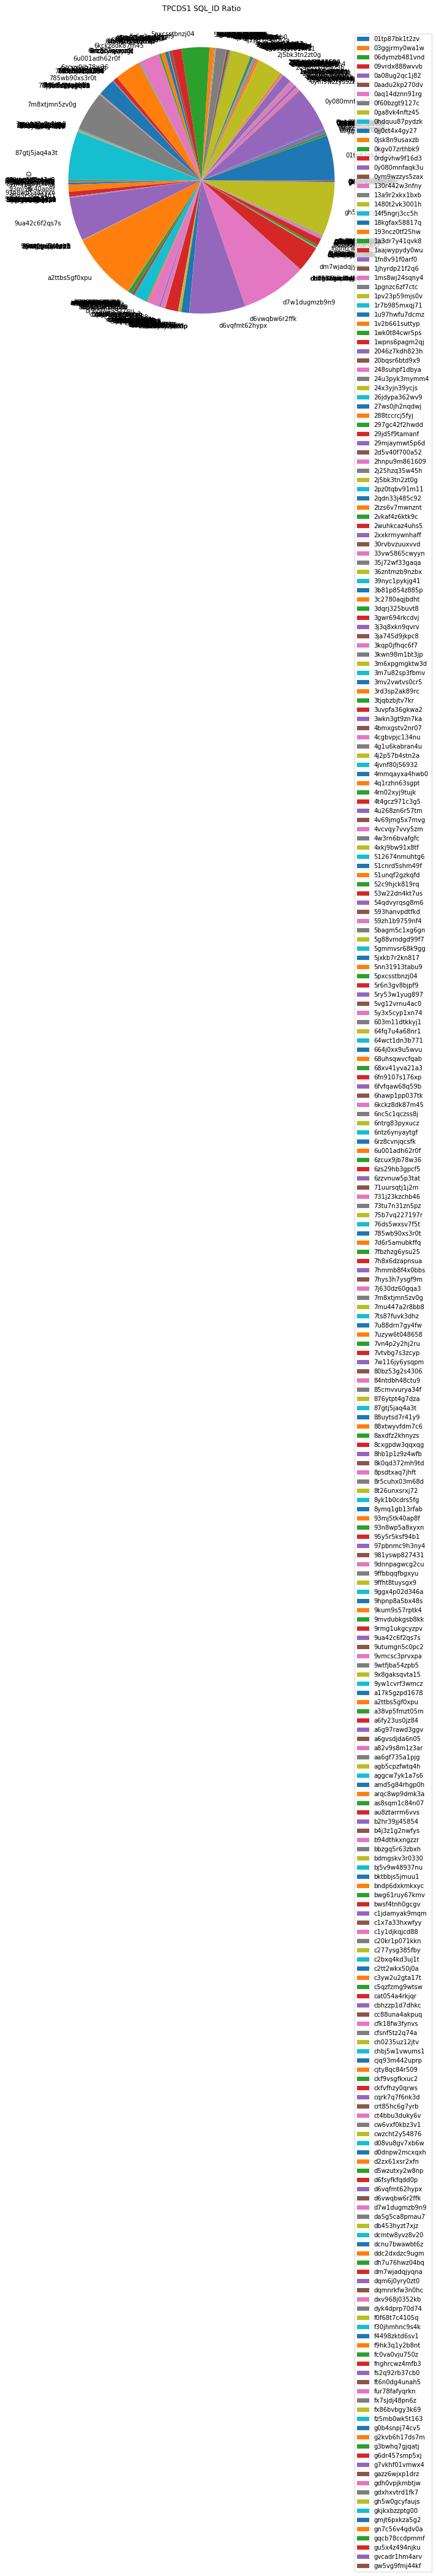

In [229]:
ssv.plot_snapshot_ratios(column="SQL_ID")

### Cardinality 

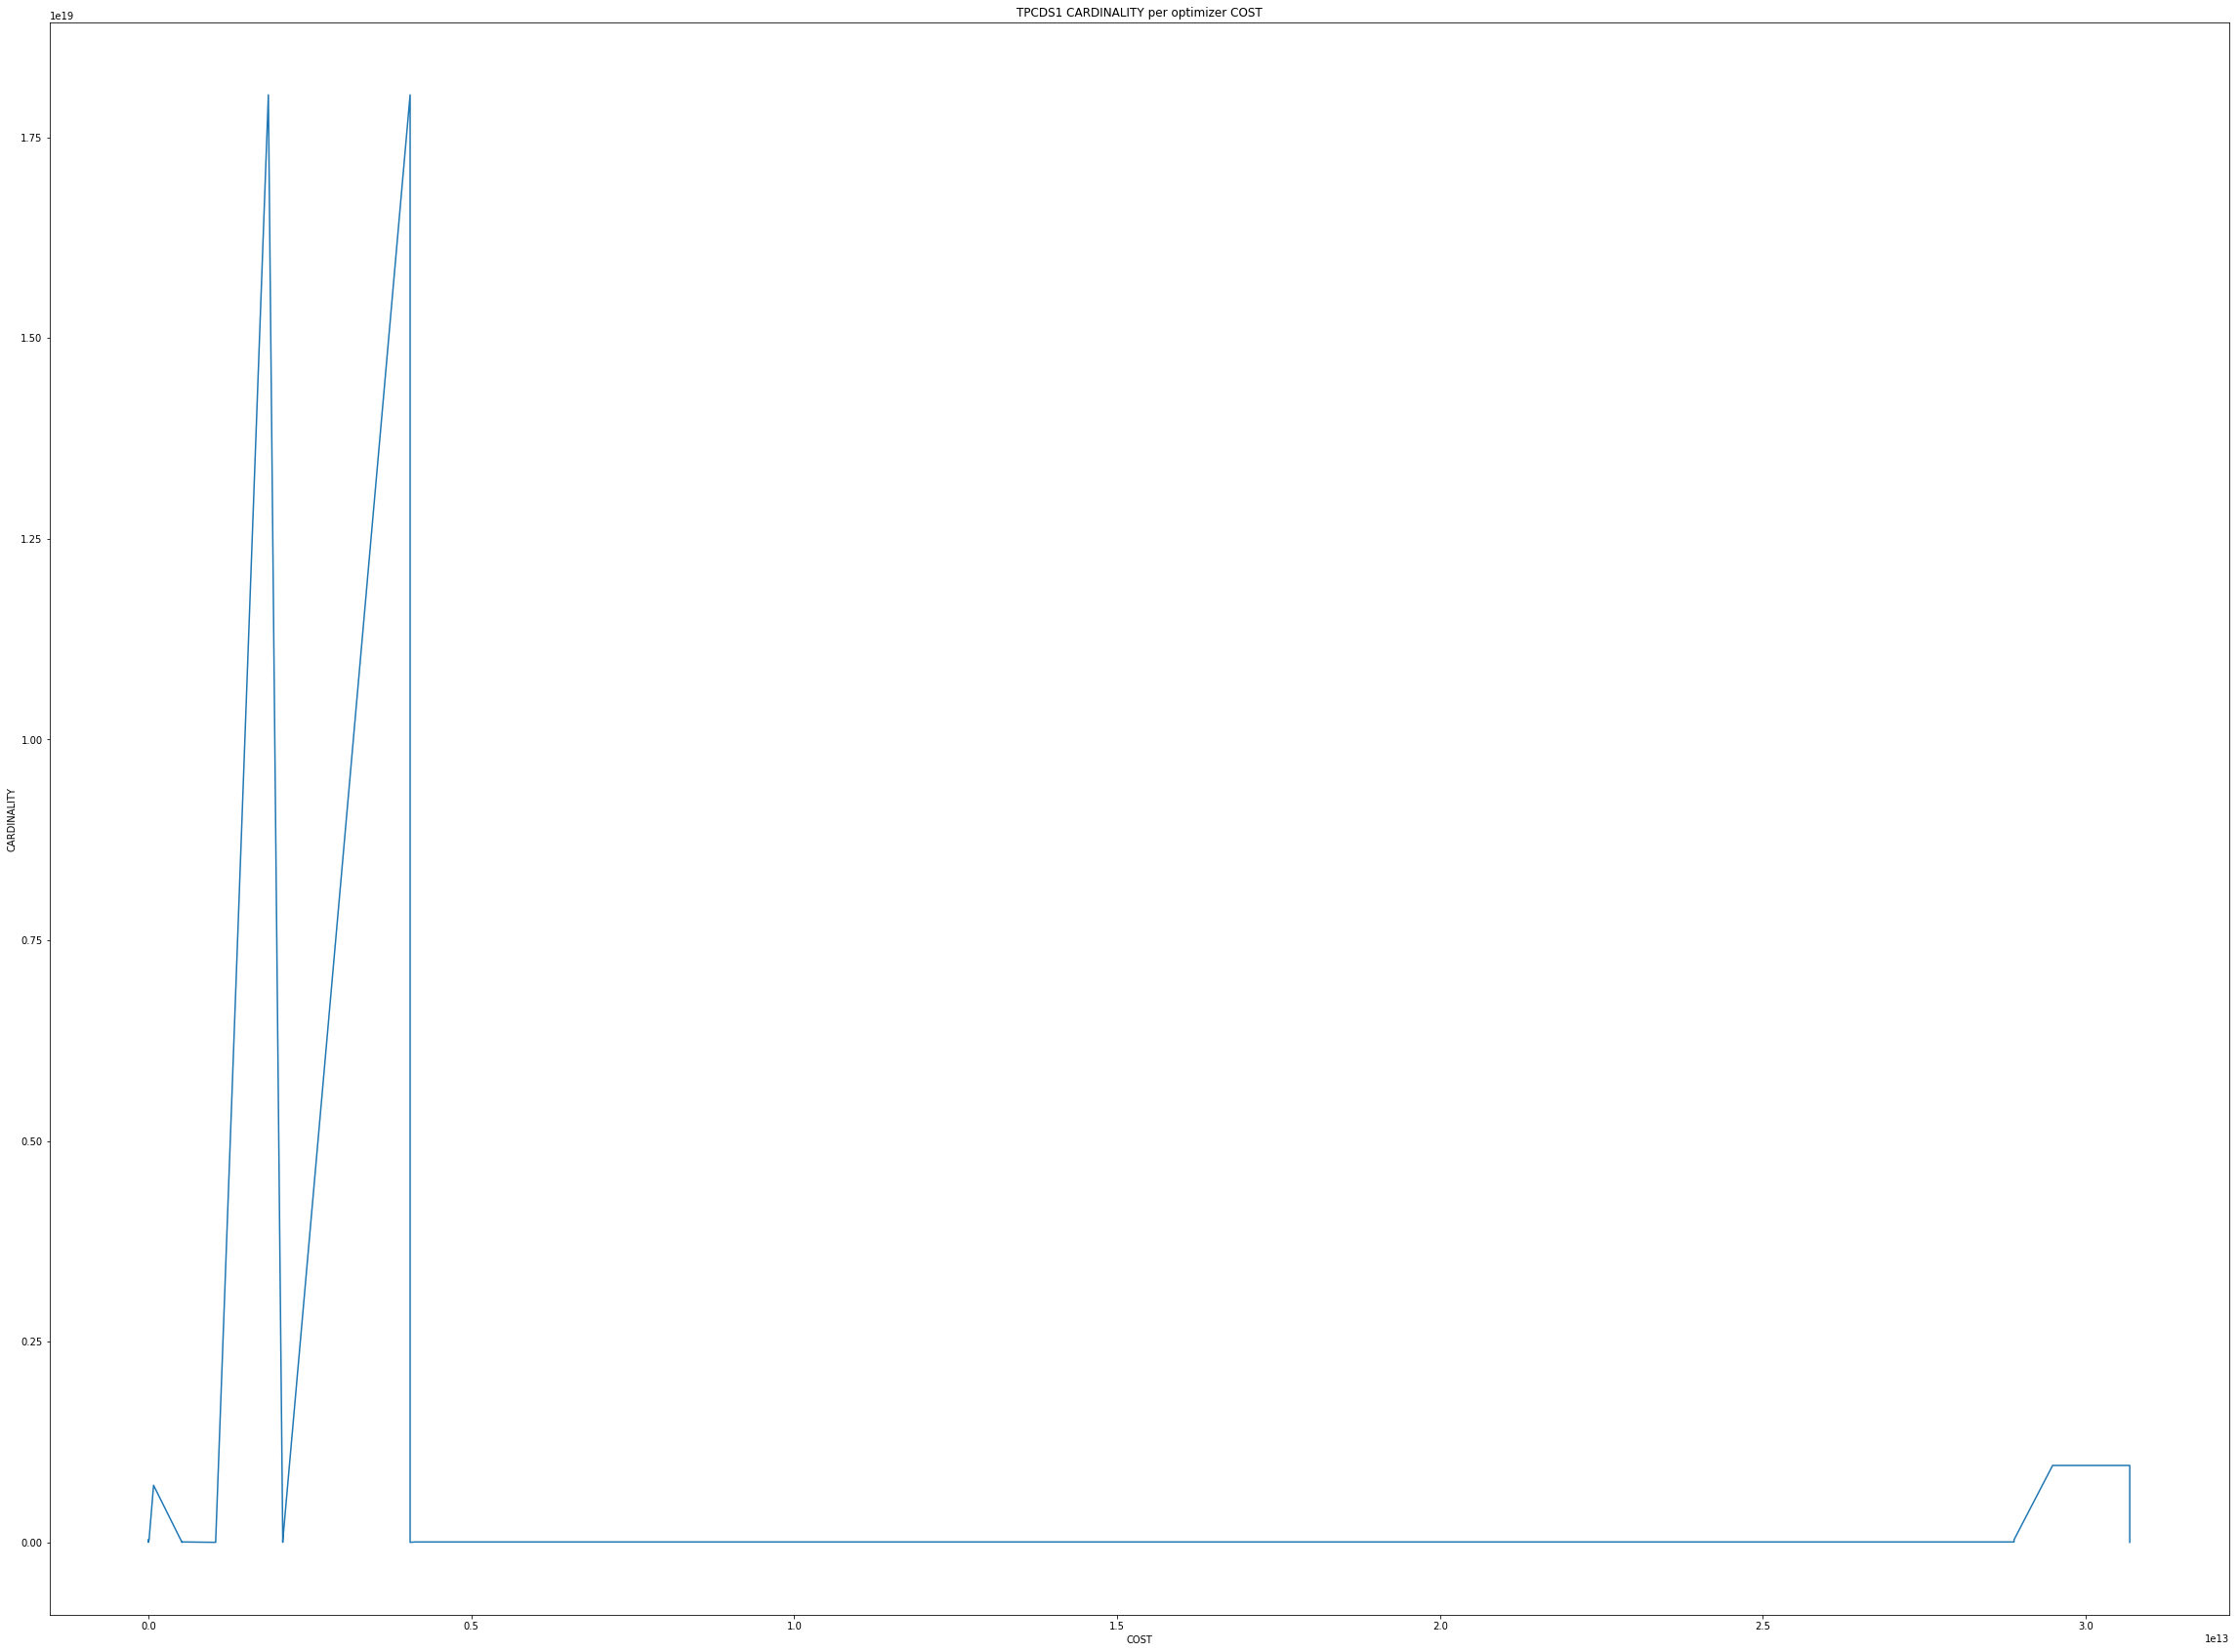

In [230]:
ssv.plot_snapshot_distribution(column="CARDINALITY")

### Cost

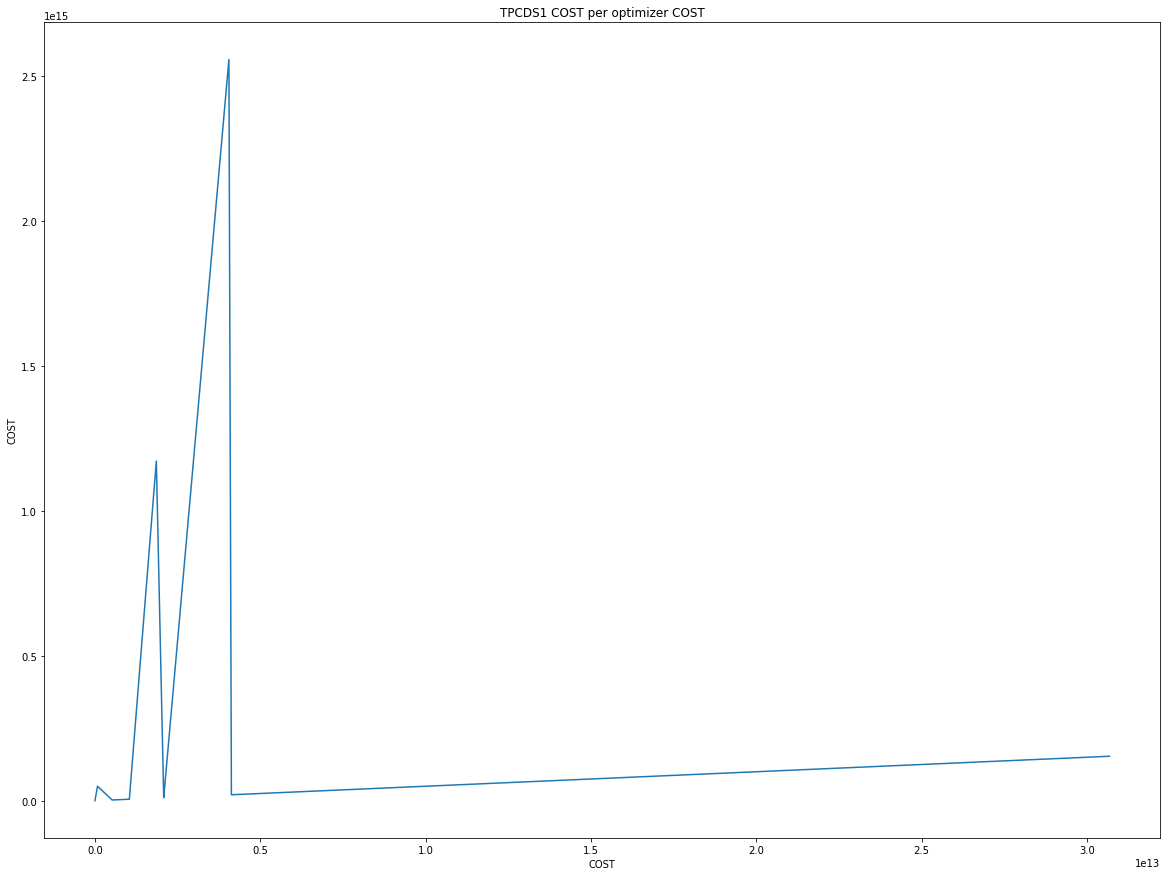

In [231]:
ssv.plot_snapshot_distribution(column="COST")

### Bytes 

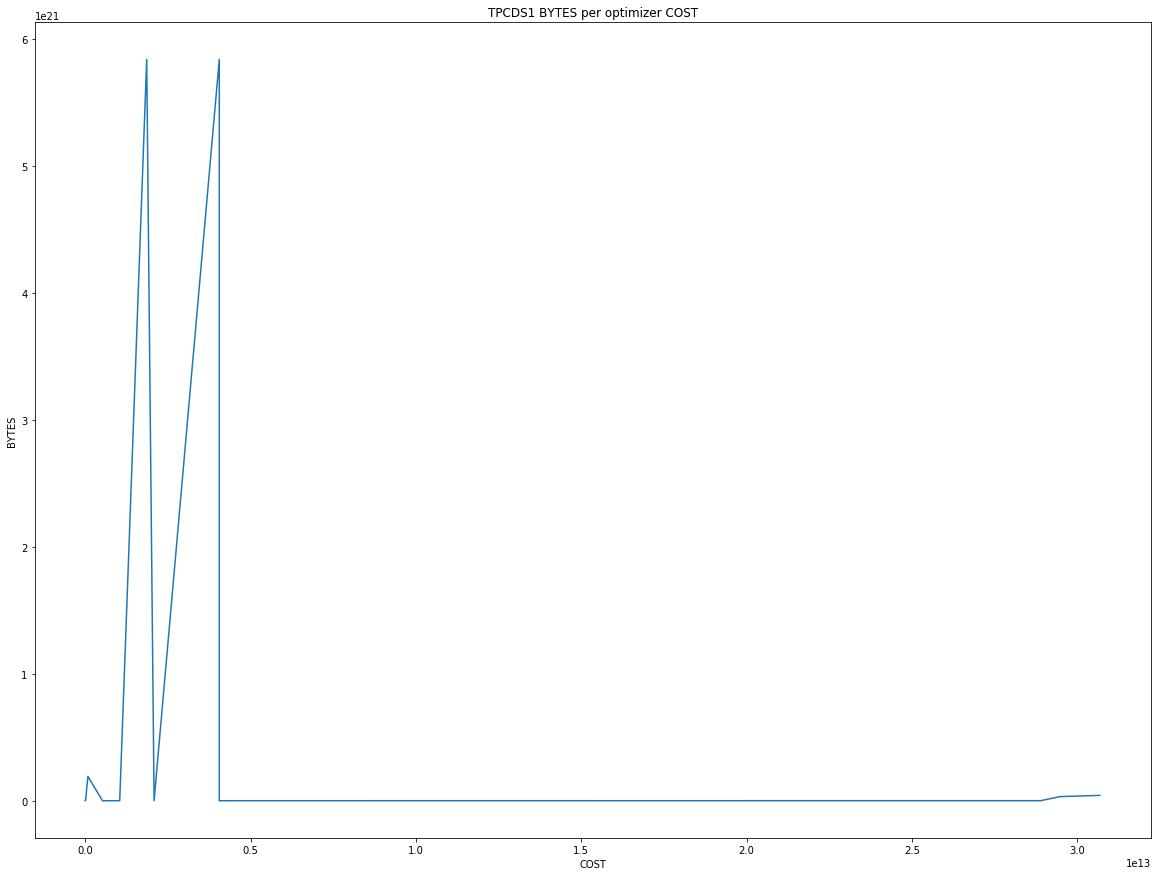

In [232]:
rep_vsql_plan_df[rep_vsql_plan_df['BYTES']=='']=0
ssv.plot_snapshot_distribution(column="BYTES")

### CPU Cost

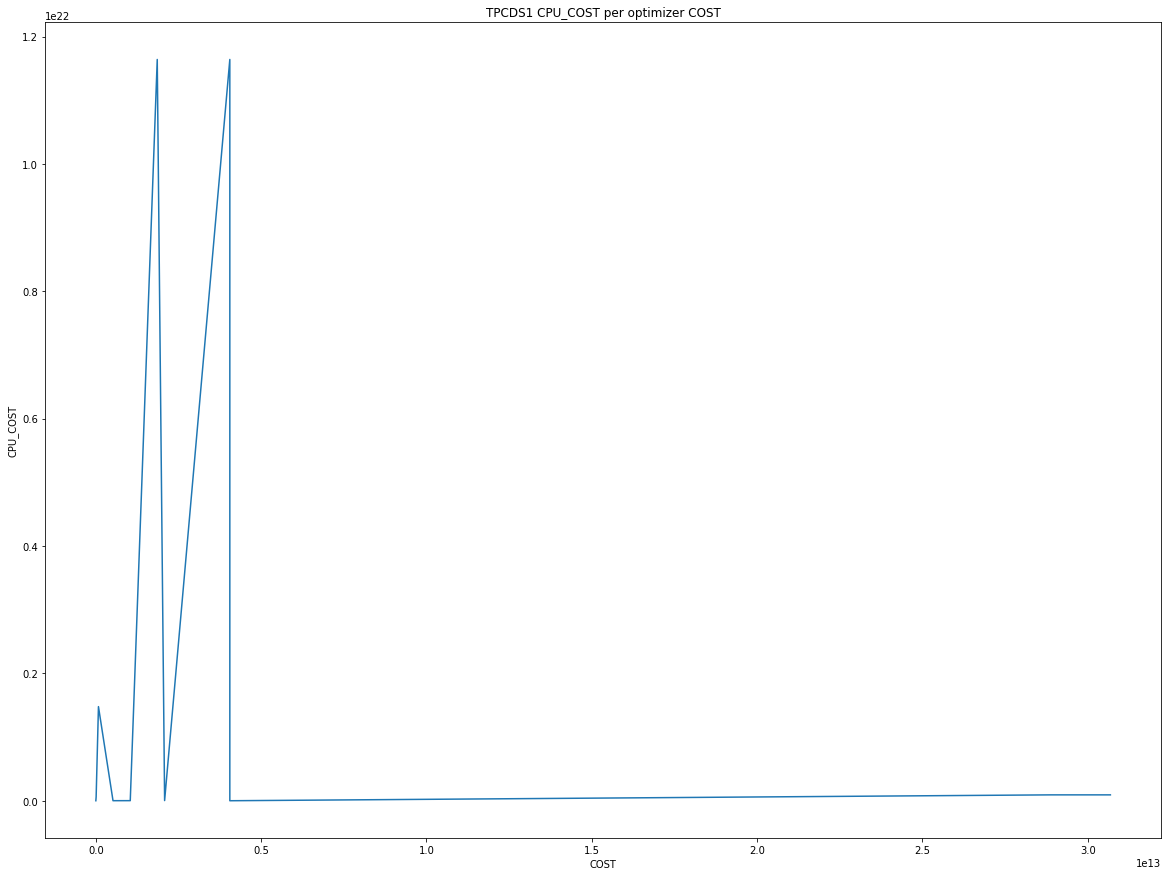

In [233]:
rep_vsql_plan_df[rep_vsql_plan_df['CPU_COST']=='']=0
ssv.plot_snapshot_distribution(column="CPU_COST")

### IO Cost

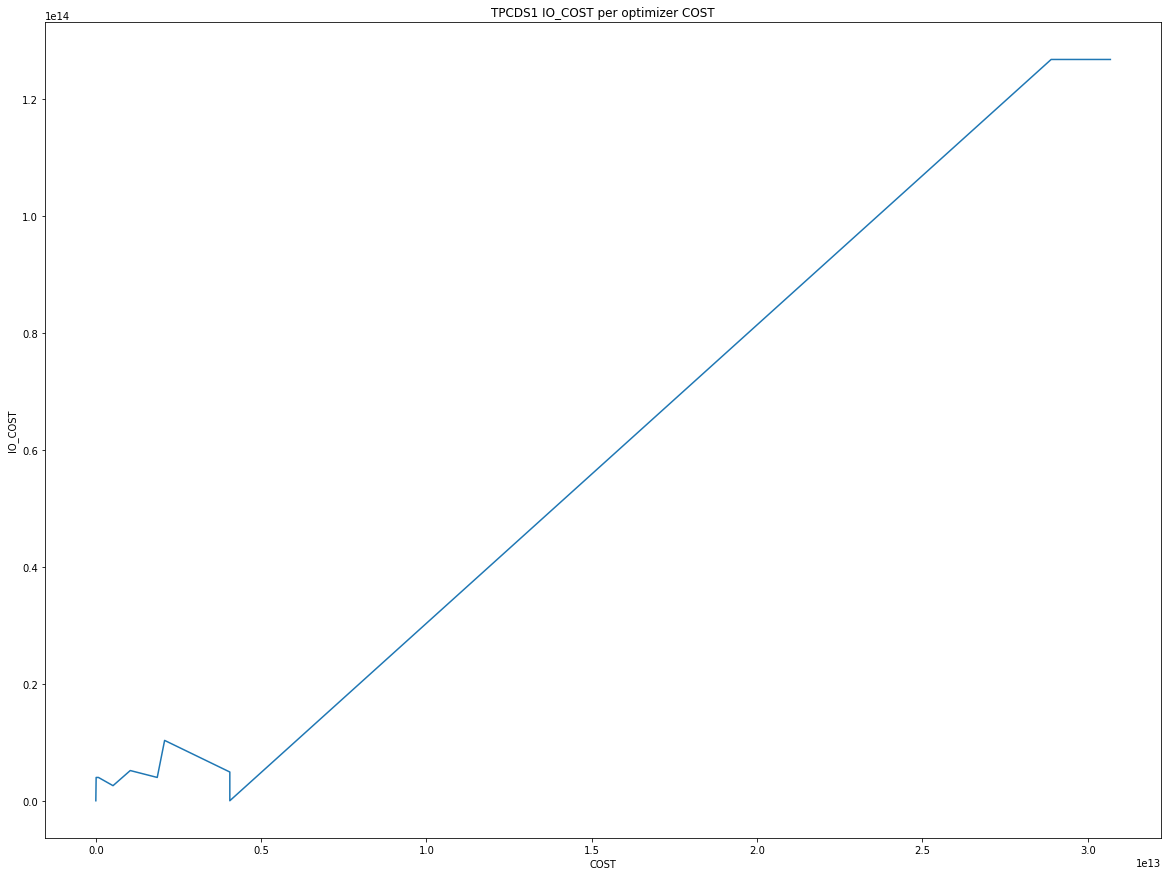

In [234]:
ssv.plot_snapshot_distribution(column="IO_COST")

### Time

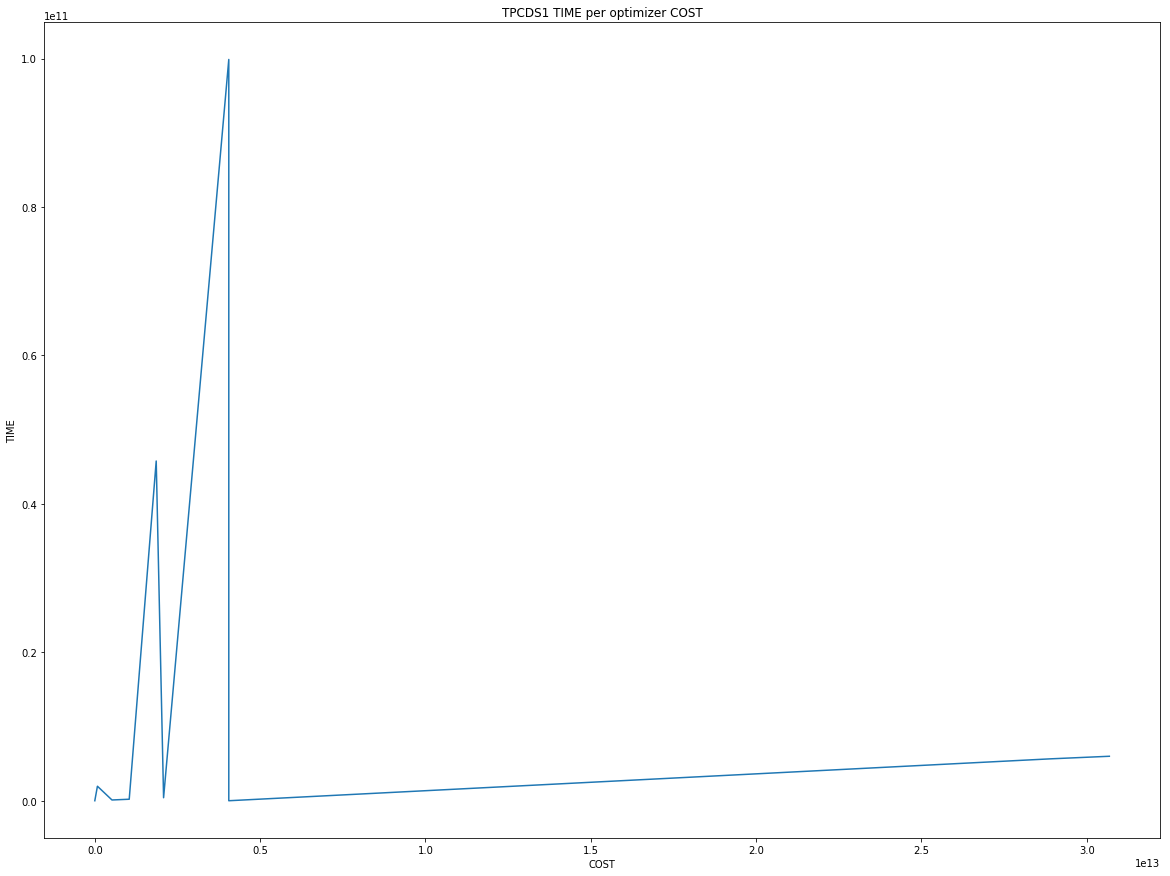

In [235]:
ssv.plot_snapshot_distribution(column="TIME")

### Operation

Name of the internal operation performed in this step (for example, TABLE ACCESS)

OPERATION-(1999999, 39)


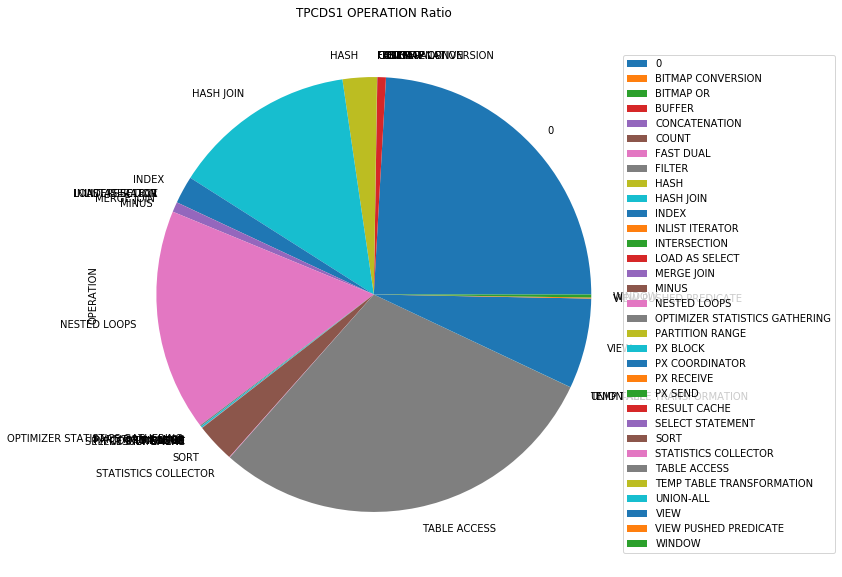

In [236]:
ssv.plot_snapshot_ratios(column="OPERATION")

### Options

A variation on the operation described in the OPERATION column (for example, FULL)

OPTIONS-(1999999, 39)


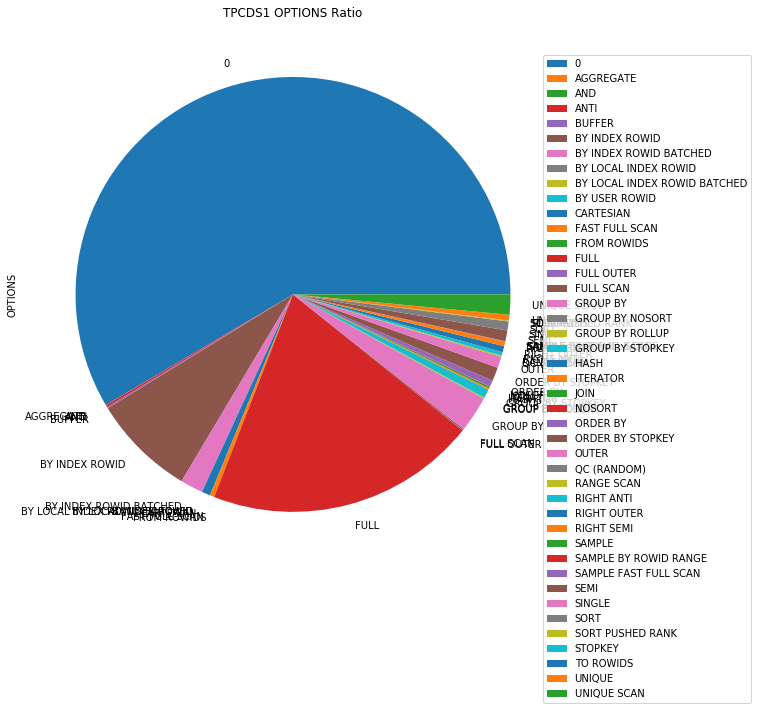

In [237]:
ssv.plot_snapshot_ratios(column="OPTIONS")

### Object Owner

Name of the user who owns the schema containing the table or index

OBJECT_OWNER-(1999999, 39)


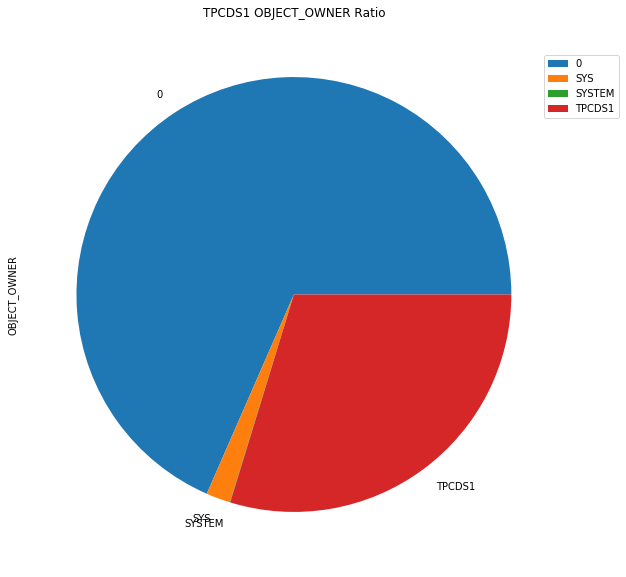

In [238]:
ssv.plot_snapshot_ratios(column="OBJECT_OWNER")

# TPC-DS Query Variants

Amongst the established workload, a number of TPC-DS query variants are generated at random during a schedule's execution. Variants are copies of each respective query number, with Oracle Optimizer hints injected in respective SQLs so as to influence the access plan opted for at runtime. This achieves the goal of creating outliers within the established schedule.

The following queries were used to establish SQL variants:
* 5
* 10
* 14
* 18
* 22
* 27
* 35
* 36
* 51
* 67
* 70
* 77
* 80
* 86

Of noticable mention for hints which were used, includes:
* FULL optimizer hint - https://docs.oracle.com/cd/E11882_01/server.112/e41084/sql_elements006.htm#SQLRF50401
* USE_NL optimizer hint - https://docs.oracle.com/cd/E11882_01/server.112/e41084/sql_elements006.htm#BABDDFHC

In addition, variants were modified to retrieve a 10,000 rows (instead of the standard 100).

### Query 5 	  	  
``` sql
with ssr as
 (select /*+full(salesreturns)*/ s_store_id,
        sum(sales_price) as sales,
        sum(profit) as profit,
        sum(return_amt) as returns,
        sum(net_loss) as profit_loss
 from
  ( select  ss_store_sk as store_sk,
            ss_sold_date_sk  as date_sk,
            ss_ext_sales_price as sales_price,
            ss_net_profit as profit,
            cast(0 as decimal(7,2)) as return_amt,
            cast(0 as decimal(7,2)) as net_loss
    from store_sales
    union all
    select sr_store_sk as store_sk,
           sr_returned_date_sk as date_sk,
           cast(0 as decimal(7,2)) as sales_price,
           cast(0 as decimal(7,2)) as profit,
           sr_return_amt as return_amt,
           sr_net_loss as net_loss
    from store_returns
   ) salesreturns,
     date_dim,
     store
 where date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-19','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-19','yyyy/mm/dd') +  14,'yyyy-mm-dd'))
       and store_sk = s_store_sk
 group by s_store_id)
 ,
 csr as
 (select cp_catalog_page_id,
        sum(sales_price) as sales,
        sum(profit) as profit,
        sum(return_amt) as returns,
        sum(net_loss) as profit_loss
 from
  ( select  cs_catalog_page_sk as page_sk,
            cs_sold_date_sk  as date_sk,
            cs_ext_sales_price as sales_price,
            cs_net_profit as profit,
            cast(0 as decimal(7,2)) as return_amt,
            cast(0 as decimal(7,2)) as net_loss
    from catalog_sales
    union all
    select cr_catalog_page_sk as page_sk,
           cr_returned_date_sk as date_sk,
           cast(0 as decimal(7,2)) as sales_price,
           cast(0 as decimal(7,2)) as profit,
           cr_return_amount as return_amt,
           cr_net_loss as net_loss
    from catalog_returns
   ) salesreturns,
     date_dim,
     catalog_page
 where date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-19','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-19','yyyy/mm/dd') +  14,'yyyy-mm-dd'))
       and page_sk = cp_catalog_page_sk
 group by cp_catalog_page_id)
 ,
 wsr as
 (select web_site_id,
        sum(sales_price) as sales,
        sum(profit) as profit,
        sum(return_amt) as returns,
        sum(net_loss) as profit_loss
 from
  ( select  ws_web_site_sk as wsr_web_site_sk,
            ws_sold_date_sk  as date_sk,
            ws_ext_sales_price as sales_price,
            ws_net_profit as profit,
            cast(0 as decimal(7,2)) as return_amt,
            cast(0 as decimal(7,2)) as net_loss
    from web_sales
    union all
    select ws_web_site_sk as wsr_web_site_sk,
           wr_returned_date_sk as date_sk,
           cast(0 as decimal(7,2)) as sales_price,
           cast(0 as decimal(7,2)) as profit,
           wr_return_amt as return_amt,
           wr_net_loss as net_loss
    from web_returns left outer join web_sales on
         ( wr_item_sk = ws_item_sk
           and wr_order_number = ws_order_number)
   ) salesreturns,
     date_dim,
     web_site
 where date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-19','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-19','yyyy/mm/dd') +  14,'yyyy-mm-dd'))
       and wsr_web_site_sk = web_site_sk
 group by web_site_id)
 select * from ( select  channel
        , id
        , sum(sales) as sales
        , sum(returns) as returns
        , sum(profit) as profit
 from 
 (select 'store channel' as channel
        , 'store' || s_store_id as id
        , sales
        , returns
        , (profit - profit_loss) as profit
 from   ssr
 union all
 select 'catalog channel' as channel
        , 'catalog_page' || cp_catalog_page_id as id
        , sales
        , returns
        , (profit - profit_loss) as profit
 from  csr
 union all
 select 'web channel' as channel
        , 'web_site' || web_site_id as id
        , sales
        , returns
        , (profit - profit_loss) as profit
 from   wsr
 ) x
 group by rollup (channel, id)
 order by channel
         ,id
  ) where rownum <= 10000;
```

### Query 10
``` sql
select * from (select
  cd_gender,
  cd_marital_status,
  cd_education_status,
  count(*) cnt1,
  cd_purchase_estimate,
  count(*) cnt2,
  cd_credit_rating,
  count(*) cnt3,
  cd_dep_count,
  count(*) cnt4,
  cd_dep_employed_count,
  count(*) cnt5,
  cd_dep_college_count,
  count(*) cnt6
 from
  customer c,customer_address ca,customer_demographics
 where
  c.c_current_addr_sk = ca.ca_address_sk and
  ca_county in ('Fairfield County','Campbell County','Washtenaw County','Escambia County','Cleburne County') and
  cd_demo_sk = c.c_current_cdemo_sk and
  exists (select /*+full(date_dim) full(STORE_SALES)*/ *
          from store_sales,date_dim
          where c.c_customer_sk = ss_customer_sk and
                ss_sold_date_sk = d_date_sk and
                d_year = 2001 and
                d_moy between 3 and 3+3) and
   (exists (select *
            from web_sales,date_dim
            where c.c_customer_sk = ws_bill_customer_sk and
                  ws_sold_date_sk = d_date_sk and
                  d_year = 2001 and
                  d_moy between 3 ANd 3+3) or
    exists (select /*+full(catalog_sales)*/ *
            from catalog_sales,date_dim
            where c.c_customer_sk = cs_ship_customer_sk and
                  cs_sold_date_sk = d_date_sk and
                  d_year = 2001 and
                  d_moy between 3 and 3+3))
 group by cd_gender,
          cd_marital_status,
          cd_education_status,
          cd_purchase_estimate,
          cd_credit_rating,
          cd_dep_count,
          cd_dep_employed_count,
          cd_dep_college_count
 order by cd_gender,
          cd_marital_status,
          cd_education_status,
          cd_purchase_estimate,
          cd_credit_rating,
          cd_dep_count,
          cd_dep_employed_count,
          cd_dep_college_count
 ) where rownum <= 10000;
 ```

### Query 14
``` sql
select * from (select  /*+full(catalog_sales)*/ i_item_id,
        ca_country,
        ca_state,
        ca_county,
        avg( cast(cs_quantity as decimal(12,2))) agg1,
        avg( cast(cs_list_price as decimal(12,2))) agg2,
        avg( cast(cs_coupon_amt as decimal(12,2))) agg3,
        avg( cast(cs_sales_price as decimal(12,2))) agg4,
        avg( cast(cs_net_profit as decimal(12,2))) agg5,
        avg( cast(c_birth_year as decimal(12,2))) agg6,
        avg( cast(cd1.cd_dep_count as decimal(12,2))) agg7
 from catalog_sales, customer_demographics cd1,
      customer_demographics cd2, customer, customer_address, date_dim, item
 where cs_sold_date_sk = d_date_sk and
       cs_item_sk = i_item_sk and
       cs_bill_cdemo_sk = cd1.cd_demo_sk and
       cs_bill_customer_sk = c_customer_sk and
       cd1.cd_gender = 'F' and
       cd1.cd_education_status = 'Primary' and
       c_current_cdemo_sk = cd2.cd_demo_sk and
       c_current_addr_sk = ca_address_sk and
       c_birth_month in (1,3,7,11,10,4) and
       d_year = 2001 and
       ca_state in ('AL','MO','TN'
                   ,'GA','MT','IN','CA')
 group by rollup (i_item_id, ca_country, ca_state, ca_county)
 order by ca_country,
        ca_state,
        ca_county,
	i_item_id
  ) where rownum <= 10000;
```

### Query 18
``` sql
select * from (select  /*+full(catalog_sales)*/ i_item_id,
        ca_country,
        ca_state,
        ca_county,
        avg( cast(cs_quantity as decimal(12,2))) agg1,
        avg( cast(cs_list_price as decimal(12,2))) agg2,
        avg( cast(cs_coupon_amt as decimal(12,2))) agg3,
        avg( cast(cs_sales_price as decimal(12,2))) agg4,
        avg( cast(cs_net_profit as decimal(12,2))) agg5,
        avg( cast(c_birth_year as decimal(12,2))) agg6,
        avg( cast(cd1.cd_dep_count as decimal(12,2))) agg7
 from catalog_sales, customer_demographics cd1,
      customer_demographics cd2, customer, customer_address, date_dim, item
 where cs_sold_date_sk = d_date_sk and
       cs_item_sk = i_item_sk and
       cs_bill_cdemo_sk = cd1.cd_demo_sk and
       cs_bill_customer_sk = c_customer_sk and
       cd1.cd_gender = 'F' and
       cd1.cd_education_status = 'Primary' and
       c_current_cdemo_sk = cd2.cd_demo_sk and
       c_current_addr_sk = ca_address_sk and
       c_birth_month in (1,3,7,11,10,4) and
       d_year = 2001 and
       ca_state in ('AL','MO','TN'
                   ,'GA','MT','IN','CA')
 group by rollup (i_item_id, ca_country, ca_state, ca_county)
 order by ca_country,
        ca_state,
        ca_county,
	i_item_id
  ) where rownum <= 10000;
```

### Query 22
```sql
select * from (select  /*+use_nl(date_dim,item)*/ i_product_name
             ,i_brand
             ,i_class
             ,i_category
             ,avg(inv_quantity_on_hand) qoh
       from inventory
           ,date_dim
           ,item
       where inv_date_sk=d_date_sk
              and inv_item_sk=i_item_sk
              and d_month_seq between 1200 and 1200 + 11
       group by rollup(i_product_name
                       ,i_brand
                       ,i_class
                       ,i_category)
order by qoh, i_product_name, i_brand, i_class, i_category
 ) where rownum <= 10000;
```

### Query 27
``` sql
select * from (select /*+full(store_sales)*/ i_item_id,
        s_state, grouping(s_state) g_state,
        avg(ss_quantity) agg1,
        avg(ss_list_price) agg2,
        avg(ss_coupon_amt) agg3,
        avg(ss_sales_price) agg4
 from store_sales, customer_demographics, date_dim, store, item
 where ss_sold_date_sk = d_date_sk and
       ss_item_sk = i_item_sk and
       ss_store_sk = s_store_sk and
       ss_cdemo_sk = cd_demo_sk and
       cd_gender = 'M' and
       cd_marital_status = 'W' and
       cd_education_status = 'Secondary' and
       d_year = 1999 and
       s_state in ('TN','TN', 'TN', 'TN', 'TN', 'TN')
 group by rollup (i_item_id, s_state)
 order by i_item_id
         ,s_state
  ) where rownum <= 10000;
```

### Query 35
``` sql
select * from (select
  ca_state,
  cd_gender,
  cd_marital_status,
  cd_dep_count,
  count(*) cnt1,
  avg(cd_dep_count),
  stddev_samp(cd_dep_count),
  sum(cd_dep_count),
  cd_dep_employed_count,
  count(*) cnt2,
  avg(cd_dep_employed_count),
  stddev_samp(cd_dep_employed_count),
  sum(cd_dep_employed_count),
  cd_dep_college_count,
  count(*) cnt3,
  avg(cd_dep_college_count),
  stddev_samp(cd_dep_college_count),
  sum(cd_dep_college_count)
 from
  customer c,customer_address ca,customer_demographics
 where
  c.c_current_addr_sk = ca.ca_address_sk and
  cd_demo_sk = c.c_current_cdemo_sk and
  exists (select *
          from store_sales,date_dim
          where c.c_customer_sk = ss_customer_sk and
                ss_sold_date_sk = d_date_sk and
                d_year = 1999 and
                d_qoy < 4) and
   (exists (select *
            from web_sales,date_dim
            where c.c_customer_sk = ws_bill_customer_sk and
                  ws_sold_date_sk = d_date_sk and
                  d_year = 1999 and
                  d_qoy < 4) or
    exists (select /*+full(CATALOG_SALES)*/ *
            from catalog_sales,date_dim
            where c.c_customer_sk = cs_ship_customer_sk and
                  cs_sold_date_sk = d_date_sk and
                  d_year = 1999 and
                  d_qoy < 4))
 group by ca_state,
          cd_gender,
          cd_marital_status,
          cd_dep_count,
          cd_dep_employed_count,
          cd_dep_college_count
 order by ca_state,
          cd_gender,
          cd_marital_status,
          cd_dep_count,
          cd_dep_employed_count,
          cd_dep_college_count
  ) where rownum <= 10000;
```

### Query 36
``` sql
select * from (select /*+full(STORE_SALES)*/
    sum(ss_net_profit)/sum(ss_ext_sales_price) as gross_margin
   ,i_category
   ,i_class
   ,grouping(i_category)+grouping(i_class) as lochierarchy
   ,rank() over (
 	partition by grouping(i_category)+grouping(i_class),
 	case when grouping(i_class) = 0 then i_category end
 	order by sum(ss_net_profit)/sum(ss_ext_sales_price) asc) as rank_within_parent
 from
    store_sales
   ,date_dim       d1
   ,item
   ,store
 where
    d1.d_year = 2000
 and d1.d_date_sk = ss_sold_date_sk
 and i_item_sk  = ss_item_sk
 and s_store_sk  = ss_store_sk
 and s_state in ('TN','TN','TN','TN',
                 'TN','TN','TN','TN')
 group by rollup(i_category,i_class)
 order by
   lochierarchy desc
  ,case when lochierarchy = 0 then i_category end
  ,rank_within_parent
   ) where rownum <= 10000;
```

### Query 51
``` sql
WITH web_v1 as (
select
  ws_item_sk item_sk, d_date,
  sum(sum(ws_sales_price))
      over (partition by ws_item_sk order by d_date rows between unbounded preceding and current row) cume_sales
from web_sales
    ,date_dim
where ws_sold_date_sk=d_date_sk
  and d_month_seq between 1208 and 1208+11
  and ws_item_sk is not NULL
group by ws_item_sk, d_date),
store_v1 as (
select /*+full(STORE_SALES)*/
  ss_item_sk item_sk, d_date,
  sum(sum(ss_sales_price))
      over (partition by ss_item_sk order by d_date rows between unbounded preceding and current row) cume_sales
from store_sales
    ,date_dim
where ss_sold_date_sk=d_date_sk
  and d_month_seq between 1208 and 1208+11
  and ss_item_sk is not NULL
group by ss_item_sk, d_date)
select * from ( select  *
from (select item_sk
     ,d_date
     ,web_sales
     ,store_sales
     ,max(web_sales)
         over (partition by item_sk order by d_date rows between unbounded preceding and current row) web_cumulative
     ,max(store_sales)
         over (partition by item_sk order by d_date rows between unbounded preceding and current row) store_cumulative
     from (select case when web.item_sk is not null then web.item_sk else store.item_sk end item_sk
                 ,case when web.d_date is not null then web.d_date else store.d_date end d_date
                 ,web.cume_sales web_sales
                 ,store.cume_sales store_sales
           from web_v1 web full outer join store_v1 store on (web.item_sk = store.item_sk
                                                          and web.d_date = store.d_date)
          )x )y
where web_cumulative > store_cumulative
order by item_sk
        ,d_date
 ) where rownum <= 10000;
```

### Query 67
``` sql
select * from (select  *
from (select i_category
            ,i_class
            ,i_brand
            ,i_product_name
            ,d_year
            ,d_qoy
            ,d_moy
            ,s_store_id
            ,sumsales
            ,rank() over (partition by i_category order by sumsales desc) rk
      from (select /*+full(store_sales)*/ i_category
                  ,i_class
                  ,i_brand
                  ,i_product_name
                  ,d_year
                  ,d_qoy
                  ,d_moy
                  ,s_store_id
                  ,sum(coalesce(ss_sales_price*ss_quantity,0)) sumsales
            from store_sales
                ,date_dim
                ,store
                ,item
       where  ss_sold_date_sk=d_date_sk
          and ss_item_sk=i_item_sk
          and ss_store_sk = s_store_sk
          and d_month_seq between 1219 and 1219+11
       group by  rollup(i_category, i_class, i_brand, i_product_name, d_year, d_qoy, d_moy,s_store_id))dw1) dw2
where rk <= 100
order by i_category
        ,i_class
        ,i_brand
        ,i_product_name
        ,d_year
        ,d_qoy
        ,d_moy
        ,s_store_id
        ,sumsales
        ,rk
 ) where rownum <= 10000;
```

### Query 70
``` sql
select  * from (select /*+full(STORE_SALES)*/
    sum(ss_net_profit) as total_sum
   ,s_state
   ,s_county
   ,grouping(s_state)+grouping(s_county) as lochierarchy
   ,rank() over (
 	partition by grouping(s_state)+grouping(s_county),
 	case when grouping(s_county) = 0 then s_state end
 	order by sum(ss_net_profit) desc) as rank_within_parent
 from
    store_sales
   ,date_dim       d1
   ,store
 where
    d1.d_month_seq between 1195 and 1195+11
 and d1.d_date_sk = ss_sold_date_sk
 and s_store_sk  = ss_store_sk
 and s_state in
             ( select s_state
               from  (select s_state as s_state,
 			    rank() over ( partition by s_state order by sum(ss_net_profit) desc) as ranking
                      from   store_sales, store, date_dim
                      where  d_month_seq between 1195 and 1195+11
 			    and d_date_sk = ss_sold_date_sk
 			    and s_store_sk  = ss_store_sk
                      group by s_state
                     ) tmp1
               where ranking <= 5
             )
 group by rollup(s_state,s_county)
 order by
   lochierarchy desc
  ,case when lochierarchy = 0 then s_state end
  ,rank_within_parent
  ) where rownum <= 10000;
```

### Query 77
``` sql
with ss as
 (select s_store_sk,
         sum(ss_ext_sales_price) as sales,
         sum(ss_net_profit) as profit
 from store_sales,
      date_dim,
      store
 where ss_sold_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-16','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-16','yyyy/mm/dd') +  30,'yyyy-mm-dd'))
       and ss_store_sk = s_store_sk
 group by s_store_sk)
 ,
 sr as
 (select /*+full(STORE_RETURNS)*/ s_store_sk,
         sum(sr_return_amt) as returns,
         sum(sr_net_loss) as profit_loss
 from store_returns,
      date_dim,
      store
 where sr_returned_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-16','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-16','yyyy/mm/dd') +  30,'yyyy-mm-dd'))
       and sr_store_sk = s_store_sk
 group by s_store_sk),
 cs as
 (select /*+full(CATALOG_SALES)*/ cs_call_center_sk,
        sum(cs_ext_sales_price) as sales,
        sum(cs_net_profit) as profit
 from catalog_sales,
      date_dim
 where cs_sold_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-16','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-16','yyyy/mm/dd') +  30,'yyyy-mm-dd'))
 group by cs_call_center_sk
 ),
 cr as
 (select cr_call_center_sk,
         sum(cr_return_amount) as returns,
         sum(cr_net_loss) as profit_loss
 from catalog_returns,
      date_dim
 where cr_returned_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-16','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-16','yyyy/mm/dd') +  30,'yyyy-mm-dd'))
 group by cr_call_center_sk
 ),
 ws as
 ( select wp_web_page_sk,
        sum(ws_ext_sales_price) as sales,
        sum(ws_net_profit) as profit
 from web_sales,
      date_dim,
      web_page
 where ws_sold_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-16','yyyy-mm-dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-16','yyyy-mm-dd') +  30,'yyyy-mm-dd'))
       and ws_web_page_sk = wp_web_page_sk
 group by wp_web_page_sk),
 wr as
 (select wp_web_page_sk,
        sum(wr_return_amt) as returns,
        sum(wr_net_loss) as profit_loss
 from web_returns,
      date_dim,
      web_page
 where wr_returned_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-16','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-16','yyyy/mm/dd') +  30,'yyyy-mm-dd'))
       and wr_web_page_sk = wp_web_page_sk
 group by wp_web_page_sk)
 select * from ( select  channel
        , id
        , sum(sales) as sales
        , sum(returns) as returns
        , sum(profit) as profit
 from
 (select 'store channel' as channel
        , ss.s_store_sk as id
        , sales
        , coalesce(returns, 0) as returns
        , (profit - coalesce(profit_loss,0)) as profit
 from   ss left join sr
        on  ss.s_store_sk = sr.s_store_sk
 union all
 select 'catalog channel' as channel
        , cs_call_center_sk as id
        , sales
        , returns
        , (profit - profit_loss) as profit
 from  cs
       , cr
 union all
 select 'web channel' as channel
        , ws.wp_web_page_sk as id
        , sales
        , coalesce(returns, 0) returns
        , (profit - coalesce(profit_loss,0)) as profit
 from   ws left join wr
        on  ws.wp_web_page_sk = wr.wp_web_page_sk
 ) x
 group by rollup (channel, id)
 order by channel
         ,id
  ) where rownum <= 10000;
```

### Query 80
``` sql
with ssr as
 (select  /*+use_nl(date_dim,store)*/
          s_store_id as store_id,
          sum(ss_ext_sales_price) as sales,
          sum(coalesce(sr_return_amt, 0)) as returns,
          sum(ss_net_profit - coalesce(sr_net_loss, 0)) as profit
  from store_sales left outer join store_returns on
         (ss_item_sk = sr_item_sk and ss_ticket_number = sr_ticket_number),
     date_dim,
     store,
     item,
     promotion
 where ss_sold_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-20','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-20','yyyy/mm/dd') +  30,'yyyy-mm-dd'))
       and ss_store_sk = s_store_sk
       and ss_item_sk = i_item_sk
       and i_current_price > 50
       and ss_promo_sk = p_promo_sk
       and p_channel_tv = 'N'
 group by s_store_id)
 ,
 csr as
 (select  /*+use_nl(date_dim,store)*/
          cp_catalog_page_id as catalog_page_id,
          sum(cs_ext_sales_price) as sales,
          sum(coalesce(cr_return_amount, 0)) as returns,
          sum(cs_net_profit - coalesce(cr_net_loss, 0)) as profit
  from catalog_sales left outer join catalog_returns on
         (cs_item_sk = cr_item_sk and cs_order_number = cr_order_number),
     date_dim,
     catalog_page,
     item,
     promotion
 where cs_sold_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-20','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-20','yyyy/mm/dd') +  30,'yyyy-mm-dd'))
        and cs_catalog_page_sk = cp_catalog_page_sk
       and cs_item_sk = i_item_sk
       and i_current_price > 50
       and cs_promo_sk = p_promo_sk
       and p_channel_tv = 'N'
group by cp_catalog_page_id)
 ,
 wsr as
 (select /*+use_nl(date_dim,store)*/
          web_site_id,
          sum(ws_ext_sales_price) as sales,
          sum(coalesce(wr_return_amt, 0)) as returns,
          sum(ws_net_profit - coalesce(wr_net_loss, 0)) as profit
  from web_sales left outer join web_returns on
         (ws_item_sk = wr_item_sk and ws_order_number = wr_order_number),
     date_dim,
     web_site,
     item,
     promotion
 where ws_sold_date_sk = d_date_sk
       and d_date between to_char(to_date('2000-08-20','yyyy/mm/dd'),'yyyy-mm-dd')
                  and (to_char(to_date('2000-08-20','yyyy/mm/dd') +  30,'yyyy-mm-dd'))
        and ws_web_site_sk = web_site_sk
       and ws_item_sk = i_item_sk
       and i_current_price > 50
       and ws_promo_sk = p_promo_sk
       and p_channel_tv = 'N'
group by web_site_id)
 select * from ( select  channel
        , id
        , sum(sales) as sales
        , sum(returns) as returns
        , sum(profit) as profit
 from
 (select 'store channel' as channel
        , 'store' || store_id as id
        , sales
        , returns
        , profit
 from   ssr
 union all
 select 'catalog channel' as channel
        , 'catalog_page' || catalog_page_id as id
        , sales
        , returns
        , profit
 from  csr
 union all
 select 'web channel' as channel
        , 'web_site' || web_site_id as id
        , sales
        , returns
        , profit
 from   wsr
 ) x
 group by rollup (channel, id)
 order by channel
         ,id
  ) where rownum <= 10000;
```

### Query 86
``` sql
select * from (select  /*+full(WEB_SALES)*/
    sum(ws_net_paid) as total_sum
   ,i_category
   ,i_class
   ,grouping(i_category)+grouping(i_class) as lochierarchy
   ,rank() over (
 	partition by grouping(i_category)+grouping(i_class),
 	case when grouping(i_class) = 0 then i_category end
 	order by sum(ws_net_paid) desc) as rank_within_parent
 from
    web_sales
   ,date_dim       d1
   ,item
 where
    d1.d_month_seq between 1194 and 1194+11
 and d1.d_date_sk = ws_sold_date_sk
 and i_item_sk  = ws_item_sk
 group by rollup(i_category,i_class)
 order by
   lochierarchy desc,
   case when lochierarchy = 0 then i_category end,
   rank_within_parent
  ) where rownum <= 10000;
```